In [2]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from general_mm import GeneralizedMixtureModel, ModuledDistribution
import torch
from torch import nn
from torch.distributions import MultivariateNormal
plt.style.use('ggplot')

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

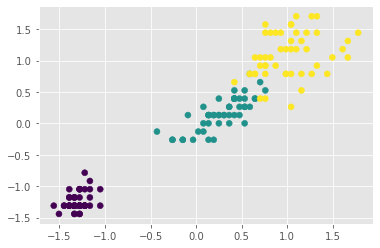

In [3]:
iris = load_iris()
print(iris)

learn_data = torch.tensor(iris.data).to(torch.float32)
learn_data = (learn_data - learn_data.mean(dim=0)) / learn_data.std(dim=0)
plt.scatter(learn_data[:, 2], learn_data[:, 3], c=iris.target)

In [4]:
cluster_num = 2

distributions = [ModuledDistribution(MultivariateNormal,
                                     {"loc": nn.Parameter(torch.randn(4)), "scale_tril": nn.Parameter(torch.eye(4))})
                 for k in range(cluster_num)]
model = GeneralizedMixtureModel(distributions, rtol=1e-10)

In [5]:
predicted = model.fit_predict(learn_data)

  8%|▊         | 75/1000 [00:05<01:05, 14.07it/s, log_prob=tensor(-322.6936)]


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1])


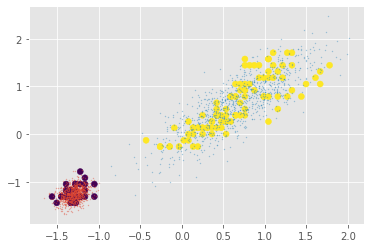

In [6]:
color = predicted.argmax(dim=0)
print(color)
plt.scatter(learn_data[:, 2], learn_data[:, 3], c=color)
for k in range(cluster_num):
    sample = distributions[k].sample([1000])[:, (2, 3)]
    plt.scatter(sample[:, 0], sample[:, 1], s=1., alpha=0.3)

In [7]:

print(distributions[1].parameter["loc"])

Parameter containing:
tensor([ 0.5054, -0.4254,  0.6502,  0.6252], requires_grad=True)
